### KNN

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3}
Accuracy: 0.87
Precision (Weighted): 0.90
Recall (Weighted): 0.87
F1 Score (Weighted): 0.88
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       227
           1       0.61      0.68      0.65        76
           2       0.39      1.00      0.56        23
           3       0.91      0.89      0.90       218
           4       0.93      0.90      0.91       214
           5       0.57      0.91      0.70        57
           6       0.89      0.87      0.88       226
           7       0.90      0.77      0.83       180
           8       0.39      0.87      0.54        30
           9       0.75      0.84      0.79        56
          10       0.94      0.88      0.91       217
          11       0.99      0.95      0.97       219
          12       0.93      0.87      0.90       232
          13       0.95   

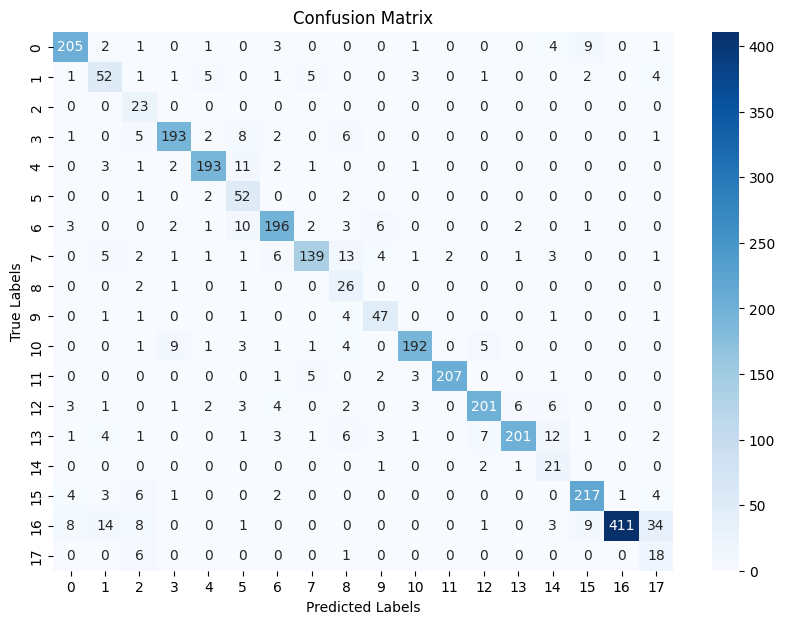

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(directory):
    features, labels = [], []
    for file in os.listdir(directory):
        if file.endswith('.npy'):
            file_path = Path(directory) / file
            data = np.load(file_path, allow_pickle=True).item()
            features.append(data['features'])
            labels.append(data['label'])
    return np.array(features), np.array(labels)

# Specify the paths to your dataset
X_train, y_train = load_data('src/train_pipeline/features_train')
X_test, y_test = load_data('src/train_pipeline/features_test')

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Extract the best estimator and its parameters
best_clf = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.75
Precision (Weighted): 0.79
Recall (Weighted): 0.75
F1 Score (Weighted): 0.76
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       227
           1       0.21      0.37      0.27        76
           2       0.47      0.87      0.61        23
           3       0.78      0.72      0.75       218
           4       0.82      0.80      0.81       214
           5       0.39      0.72      0.51        57
           6       0.80      0.75      0.77       226
           7       0.80      0.69      0.74       180
           8       0.34      0.70      0.46        30
           9       0.46      0.66      0.54        56
          10       0.73      0.61      0.66       217
          11       0.95      0.87      0.91       219
          12       0.80      0.78      0.79       232
  

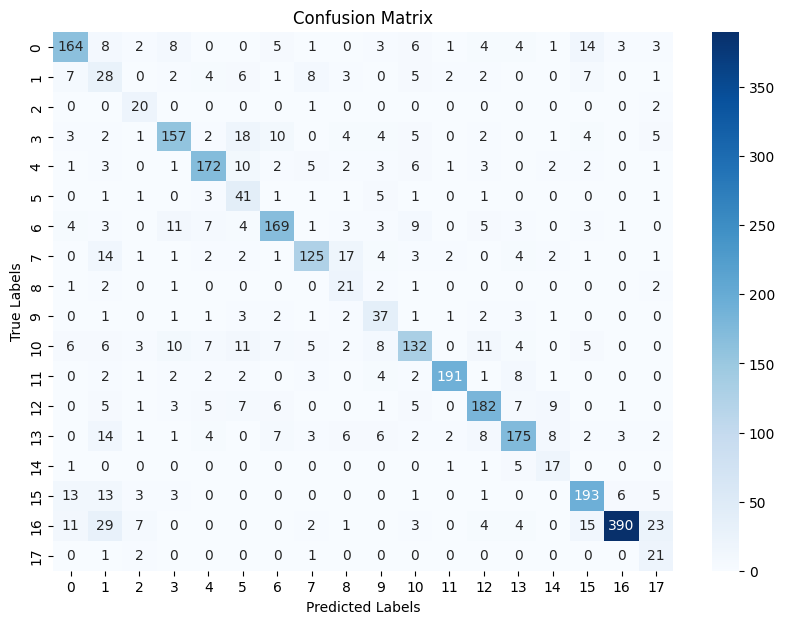

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(directory):
    features, labels = [], []
    for file in os.listdir(directory):
        if file.endswith('.npy'):
            file_path = Path(directory) / file
            data = np.load(file_path, allow_pickle=True).item()
            features.append(data['features'])
            labels.append(data['label'])
    return np.array(features), np.array(labels)

X_train, y_train = load_data('src/train_pipeline/features_train')
X_test, y_test = load_data('src/train_pipeline/features_test')

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object for Decision Tree
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Extract the best estimator and its parameters
best_clf = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_
print("Best hyperparameters:", best_hyperparameters)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()